In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import sciunit
import sciunit.scores
import neuronunit
from neuronunit.models.reduced import ReducedModel
from neuronunit.capabilities import ProducesSpikes

In [2]:
# Assumes imported neuronunit is from source, e.g. pip install -e
path = os.path.join(neuronunit.__path__[0],'models/NeuroML2/LEMS_2007One.xml')
# Instantiate three identical models
models = [ReducedModel(path, name='Izhikevich', backend='jNeuroML') for i in range(3)]

In [3]:
# Let the first two models remain identical but change the third one
models[2].set_attrs({'izhikevich2007Cell':{'a':'0.04 per_ms'}})
models[2].name = 'Izhikevich_new'

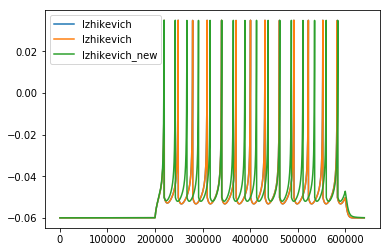

In [4]:
for model in models:
    plt.plot(model.get_membrane_potential(),label=model)
plt.legend();

In [5]:
# A new M2M test which will compare the equality of spike counts across models
class MyTest(sciunit.TestM2M):
    required_capabilities = (ProducesSpikes,)
    score_type = sciunit.scores.BooleanScore
    def generate_prediction(self,model):
        count = model.get_spike_count()
        return count
    def compute_score(self, prediction1, prediction2):
        return self.score_type(prediction1==prediction2)

In [6]:
test = MyTest()

In [7]:
s = test.judge(models)

In [8]:
# Should show fail when comparing the third model to the other two
s

,Izhikevich,Izhikevich,Izhikevich_new
Izhikevich,Pass,Pass,Fail
Izhikevich,Pass,Pass,Fail
Izhikevich_new,Fail,Fail,Pass
